<a href="https://colab.research.google.com/github/BrianaNzivu/DSA-ML/blob/main/HateSpeechKenya_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud

In [ ]:
# Read from Hate Speech CSV
data = pd.read_csv('/HateSpeech_Kenya.csv')

   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hate_speech         48076 non-null  int64 
 1   offensive_language  48076 non-null  int64 
 2   neither             48076 non-null  int6

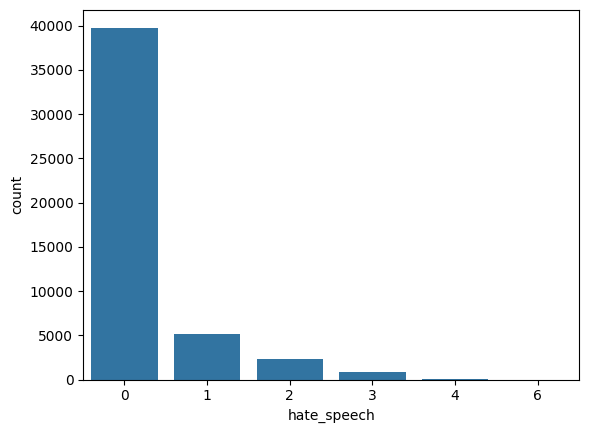

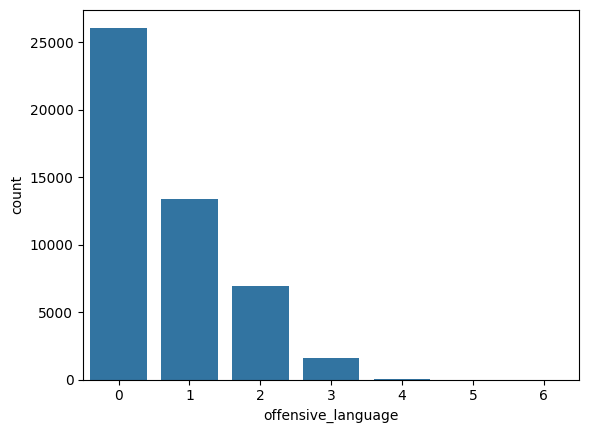

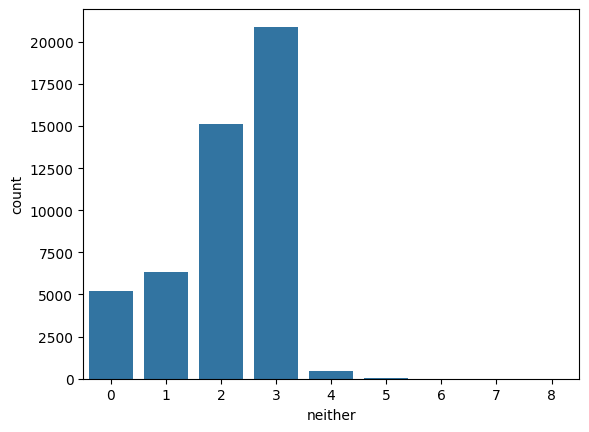

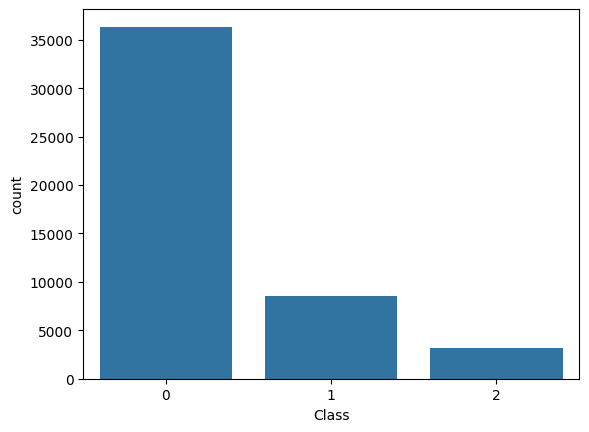

In [ ]:
# Exploratory Data Analysis
print(data.head())

print(data.info())

print(data.isnull().sum())

print(data.columns)

# Visualize class distribution
sns.countplot(x = 'hate_speech', data = data)
plt.show()

sns.countplot(x = 'offensive_language', data = data)
plt.show()

sns.countplot(x = 'neither', data = data)
plt.show()

sns.countplot(x = 'Class', data = data)
plt.show()


In [ ]:
# Define preprocessing function
def preprocess_text(text):

    # Apply preprocessing function to the correct column (e.g., 'comments')
    data['clean_text'] = data['Tweet'].apply(preprocess_text)

    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    return text

# Display first few rows of preprocessed data
print(data.head())

   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  


['The political elite are in desperation. Ordinary kalenjins are suspicious of kikuyu community']                                                                                                          1
['When jubilee thieves have no answer to any sober question they resort to abuses.Sugoi and Gatundu express is real. #NasaSinkingShip']                                                                    1
['When Kikuyu elites in power plot the murder of poor Kikuyus to cover up their evil..... #RIPMsando']                                                                                                     1
['When Kibaki had 47 PNU mps and ODM had 99 Mps did he fold up even after being defeated in the elections??be honest #NoReformsNoElections']                                                               1
['When Keter tells Ruto RAO is naming #UhuruEuroThieves in a few minutes. They forget they are in Hague pic.twitter.com/dLx4Ot3PxM']                                                

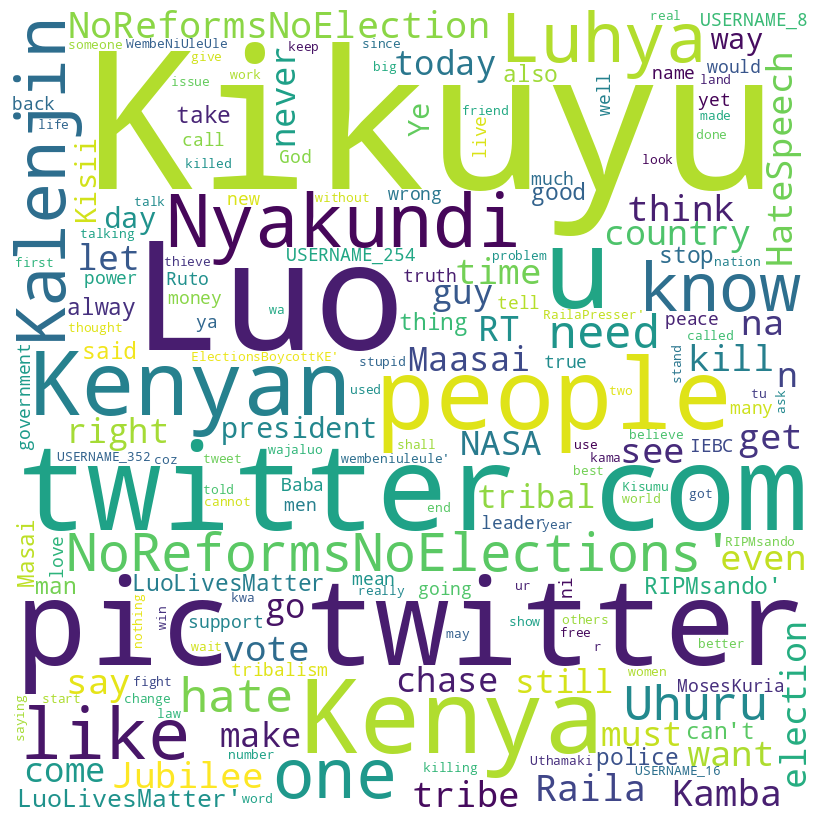

In [7]:
# Display classes present
print(data['Tweet'].value_counts())

# Create a word cloud of the clean dataset
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stop_words,
                      min_font_size = 10).generate(' '.join(data['Tweet']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()